Check knowledge base current exisiting collection.

In [5]:
from classes.VectorStore import VectorStore

# Initialize knowledge base connection
r_kb = VectorStore(collection_name="research_kb")
p_kb = VectorStore(collection_name="peer_support_kb")

In [52]:
from pprint import pprint

from sqlalchemy import text
from sqlalchemy.orm import Session


def split_source_url(url: str) -> str:
    """Split source url and return root url."""
    split_url = url.split("/")
    try:
        return split_url[2]
    except IndexError:
        return "Unknown"


collection_list = {}
unknown_list = []

# Name of collection is not working in the following code.
with Session(r_kb._kb.session_maker.bind) as session:  # noqa: SLF001
    result = session.execute(text("SELECT * FROM langchain_pg_embedding"))

    for ii in result.fetchall():
        source_url = ii[4]["source"]
        root_url = split_source_url(source_url)

        if root_url == "Unknown":
            unknown_list.append(ii)

        if root_url not in collection_list:
            collection_list[root_url] = 0
        collection_list[root_url] += 1

pprint(collection_list)

{'Unknown': 170,
 'alzconnected.org': 44350,
 'my.clevelandclinic.org': 32,
 'www.agingcare.com': 3153,
 'www.alz.org': 44,
 'www.alzheimers.gov': 113,
 'www.alzheimers.org.uk': 181,
 'www.caregiver.org': 3173,
 'www.nia.nih.gov': 408}


In [1]:
import pandas as pd

# Create DataFrame based on Table 2: Evaluation metric comparison for generation
data = {
    "Model": ["CaLM", "GPT-4o"],
    "BLEU": [0.075, 0.068],
    "CHRF": [39.726, 46.457],
    "ROUGE": [0.411, 0.431],
    "BERT_F1": [0.637, 0.636],
}

# Create the DataFrame
evaluation_metrics_df = pd.DataFrame(data)

# Display the DataFrame
print("Table 2: Evaluation metric comparison for generation")
print("=" * 55)
print(evaluation_metrics_df.to_string(index=False))

# Save to CSV for future reference
evaluation_metrics_df.to_csv("evaluation_metrics_comparison.csv", index=False)
print("\nDataFrame saved as 'evaluation_metrics_comparison.csv'")


Table 2: Evaluation metric comparison for generation
 Model  BLEU   CHRF  ROUGE  BERT_F1
  CaLM 0.075 39.726  0.411    0.637
GPT-4o 0.068 46.457  0.431    0.636

DataFrame saved as 'evaluation_metrics_comparison.csv'


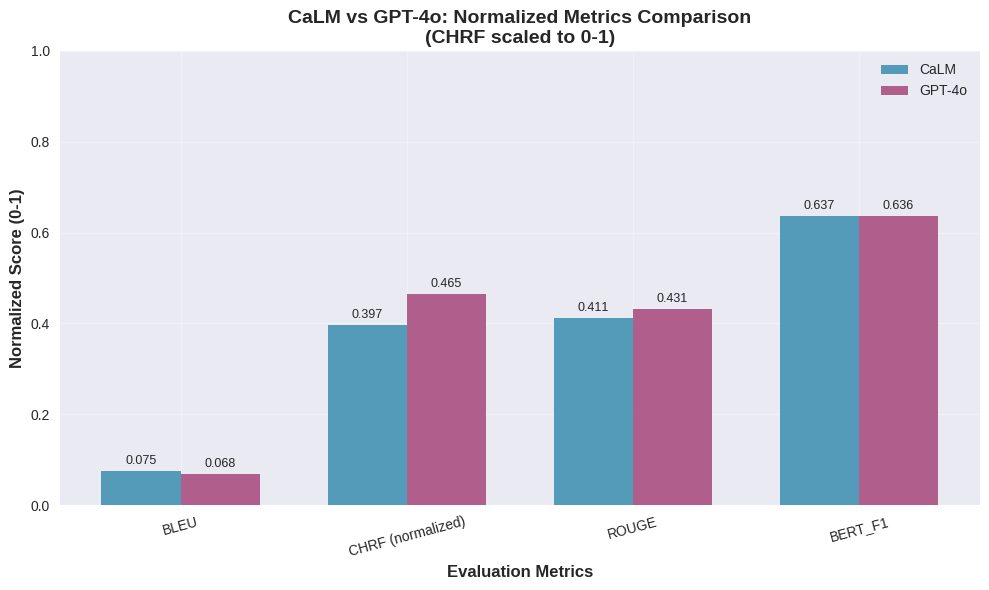


PERFORMANCE ANALYSIS SUMMARY
Metrics where CaLM performs better:
  • BLEU: 0.075 vs 0.068 (+10.3%)
  • BERT_F1: 0.637 vs 0.636 (+0.2%)

Metrics where GPT-4o performs better:
  • CHRF: 46.457 vs 39.726 (+16.9%)
  • ROUGE: 0.431 vs 0.411 (+4.9%)

Overall: CaLM shows competitive performance, excelling in 2 out of 4 metrics.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create single plot for normalized comparison
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Normalized comparison data
# Normalize CHRF to 0-1 scale for better comparison
normalized_data = {
    'BLEU': [0.075, 0.068],
    'CHRF (normalized)': [39.726/100, 46.457/100],  # Normalize CHRF to 0-1 scale
    'ROUGE': [0.411, 0.431],
    'BERT_F1': [0.637, 0.636]
}

metrics_norm = list(normalized_data.keys())
calm_norm = [normalized_data[metric][0] for metric in metrics_norm]
gpt4o_norm = [normalized_data[metric][1] for metric in metrics_norm]

x_norm = np.arange(len(metrics_norm))
width = 0.35

bars1 = ax.bar(x_norm - width/2, calm_norm, width, label='CaLM', alpha=0.8, color='#2E86AB')
bars2 = ax.bar(x_norm + width/2, gpt4o_norm, width, label='GPT-4o', alpha=0.8, color='#A23B72')

ax.set_xlabel('Evaluation Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Normalized Score (0-1)', fontsize=12, fontweight='bold')
ax.set_xticks(x_norm)
ax.set_xticklabels(metrics_norm, rotation=15)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

# Add value labels on normalized bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary analysis
print("\n" + "="*60)
print("PERFORMANCE ANALYSIS SUMMARY")
print("="*60)
print("Metrics where CaLM performs better:")
better_metrics = []
for i, metric in enumerate(metrics):
    if calm_values[i] > gpt4o_values[i]:
        diff = ((calm_values[i] - gpt4o_values[i]) / gpt4o_values[i]) * 100
        print(f"  • {metric}: {calm_values[i]:.3f} vs {gpt4o_values[i]:.3f} (+{diff:.1f}%)")
        better_metrics.append(metric)

print("\nMetrics where GPT-4o performs better:")
for i, metric in enumerate(metrics):
    if gpt4o_values[i] > calm_values[i]:
        diff = ((gpt4o_values[i] - calm_values[i]) / calm_values[i]) * 100
        print(f"  • {metric}: {gpt4o_values[i]:.3f} vs {calm_values[i]:.3f} (+{diff:.1f}%)")

print(f"\nOverall: CaLM shows competitive performance, excelling in {len(better_metrics)} out of {len(metrics)} metrics.")
